In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import plotly.express as px

In [6]:
company_list = [
    'S&P_resources/individual_stocks_5yr/AAPL_data.csv',
    'S&P_resources/individual_stocks_5yr/AMZN_data.csv',
    'S&P_resources/individual_stocks_5yr/GOOG_data.csv',
    'S&P_resources/individual_stocks_5yr/MSFT_data.csv'
    
]

In [7]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = current_df.append(all_data,ignore_index=True)
    #full_df = pd.concat([full_df, current_df],ignore_index=True)

/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_64207/4239496290.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = current_df.append(all_data,ignore_index=True)
/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_64207/4239496290.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = current_df.append(all_data,ignore_index=True)
/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_64207/4239496290.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = current_df.append(all_data,ignore_index=True)
/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_64207/4239496290.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

In [8]:
all_data

date     open    high       low   close    volume  Name
0     2013-02-08   27.350   27.71   27.3100   27.55  33318306  MSFT
1     2013-02-11   27.650   27.92   27.5000   27.86  32247549  MSFT
2     2013-02-12   27.880   28.00   27.7500   27.88  35990829  MSFT
3     2013-02-13   27.930   28.11   27.8800   28.03  41715530  MSFT
4     2013-02-14   27.920   28.06   27.8700   28.04  32663174  MSFT
...          ...      ...     ...       ...     ...       ...   ...
4747  2018-02-01  167.165  168.62  166.7600  167.78  47230787  AAPL
4748  2018-02-02  166.000  166.80  160.1000  160.50  86593825  AAPL
4749  2018-02-05  159.100  163.88  156.0000  156.49  72738522  AAPL
4750  2018-02-06  154.830  163.72  154.0000  163.03  68243838  AAPL
4751  2018-02-07  163.085  163.40  159.0685  159.54  51608580  AAPL

[4752 rows x 7 columns]

In [9]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [16]:
 all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [13]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [18]:
tech_list = all_data['Name'].unique()

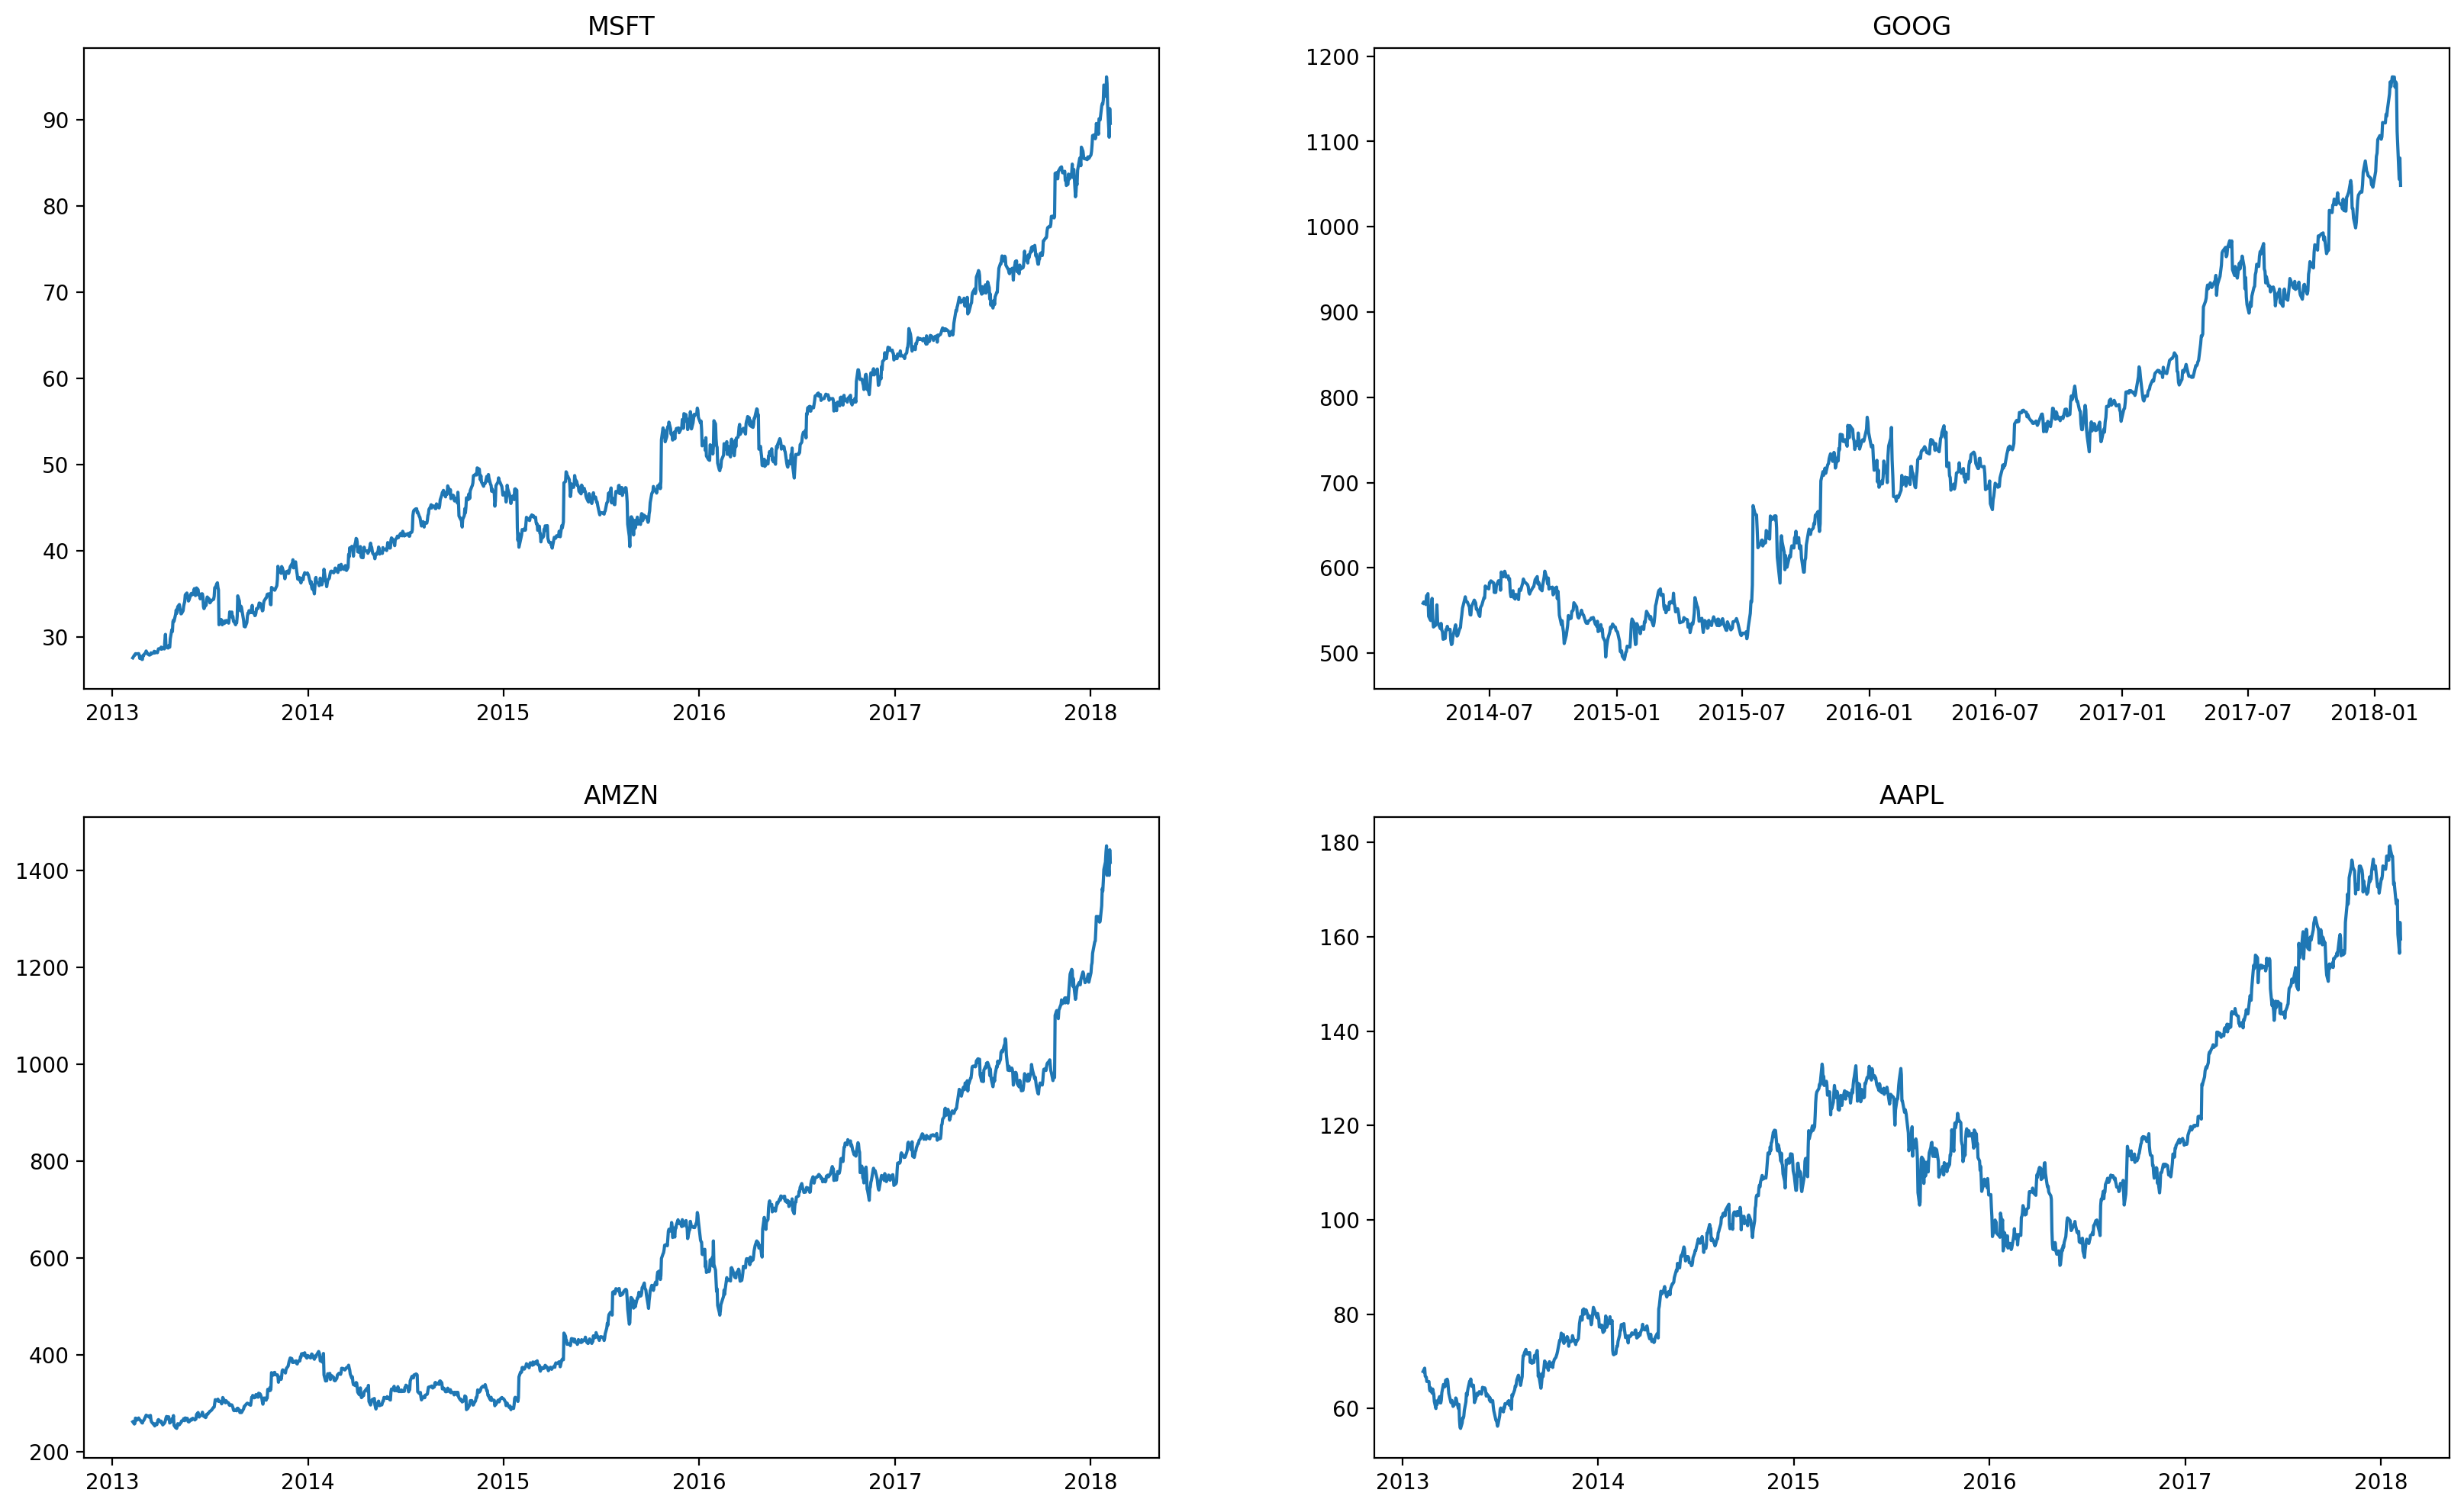

In [22]:
plt.figure(figsize=(20,12),dpi=200)
for index, company in enumerate(tech_list, 1):
    plt.subplot(2,2,index)
    filter1 = all_data['Name'] == company
    df = all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company)

In [20]:
tech_list

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

In [24]:
#check moving average

all_data['close'].rolling(window=10).mean().head(14)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
Name: close, dtype: float64

In [25]:
new_data = all_data.copy()

In [26]:
#get moving average for window of 10,20 and 50

ma_day = [10,20,50]

for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()
    

In [29]:
new_data.tail(6)

date     open      high       low   close    volume  Name  \
4746 2018-01-31  166.870  168.4417  166.5000  167.43  32478930  AAPL   
4747 2018-02-01  167.165  168.6200  166.7600  167.78  47230787  AAPL   
4748 2018-02-02  166.000  166.8000  160.1000  160.50  86593825  AAPL   
4749 2018-02-05  159.100  163.8800  156.0000  156.49  72738522  AAPL   
4750 2018-02-06  154.830  163.7200  154.0000  163.03  68243838  AAPL   
4751 2018-02-07  163.085  163.4000  159.0685  159.54  51608580  AAPL   

      close_10  close_20  close_50  
4746   173.096  174.0925  172.8726  
4747   171.948  173.8700  172.8252  
4748   170.152  173.2435  172.6356  
4749   168.101  172.3180  172.3026  
4750   166.700  171.7520  172.0640  
4751   165.232  171.0125  171.7554

In [30]:
new_data.set_index('date',inplace=True)

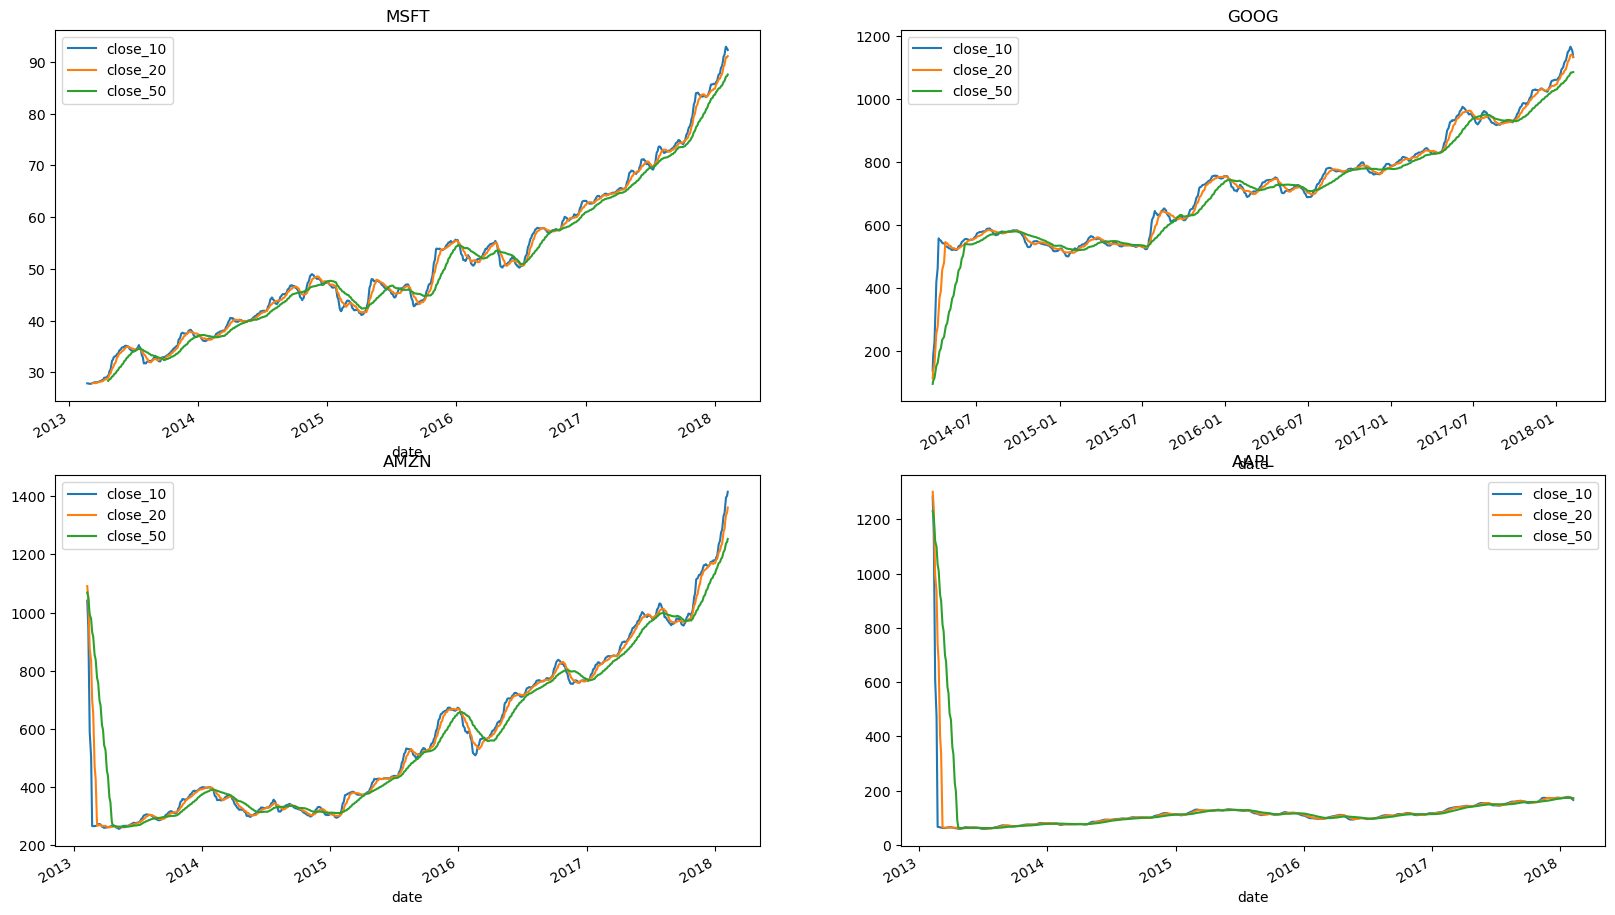

In [32]:
plt.figure(figsize=(20,12),dpi=100)
for index, company in enumerate(tech_list, 1):
    plt.subplot(2,2,index)
    filter1 = new_data['Name'] == company
    df = new_data[filter1]
    df[['close_10','close_20','close_50']].plot(ax=plt.gca())
    plt.title(company)

In [34]:
df_apple = pd.read_csv('S&P_resources/individual_stocks_5yr/AAPL_data.csv')

In [35]:
df_apple

date      open      high       low     close     volume  Name
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...          ...       ...       ...       ...       ...        ...   ...
1254  2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL
1255  2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL
1256  2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL
1257  2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL
1258  2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL

[1259 rows x 7 columns]

In [39]:
df_apple['Daily Return'] = df_apple['close'].pct_change()*100

In [42]:
px.line(df_apple,x='date',y='Daily Return')

In [79]:
df_apple

open      high       low     close     volume  Name  \
date                                                                  
2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL   
2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL   
2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL   
2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL   
2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL   
...              ...       ...       ...       ...        ...   ...   
2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL   
2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL   
2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL   
2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL   
2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL   

            Daily Return  
date                      
2013-02-08           NaN  
2013-02-11      1.042235  
2013-02-12     -2.506658  
2013-02-13     -0.190297  
2013-02-14     -0.089934  
...                  ...  
2018-02-01      0.209043  
2018-02-02     -4.339015  
2018-02-05     -2.498442  
2018-02-06      4.179181  
2018-02-07     -2.140710  

[1259 rows x 7 columns]

In [44]:
#resample the data for apple
#set the date to dt format and set it as index

df_apple['date'] = pd.to_datetime(df_apple['date'])

In [48]:
df_apple.set_index('date',inplace=True)
df_apple.head(5)

open     high      low    close     volume  Name  Daily Return
date                                                                         
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL           NaN
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL      1.042235
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL     -2.506658
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL     -0.190297
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL     -0.089934

In [49]:
df_apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

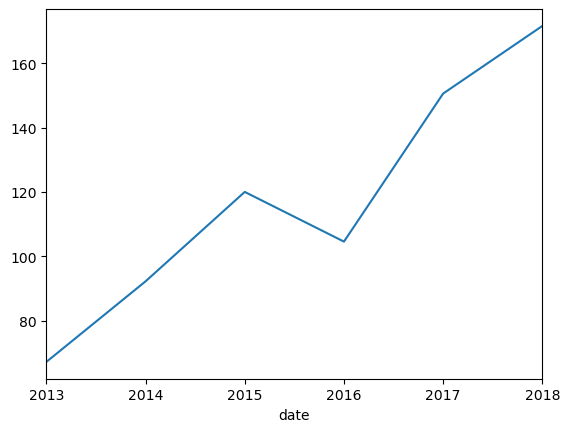

In [51]:
df_apple['close'].resample('Y').mean().plot()

In [52]:
#perform co-relation analysis of closing price for the 4 companies 

In [69]:

closing_price2 = all_data.pivot_table(index=all_data.index, columns='Name', values='close', aggfunc='first')

closing_price2.columns = [f'{col}_close' for col in closing_price.columns]

closing_price2 = closing_price.reset_index(drop=True)

closing_price2



apple_close  amzn_close  google_close  msft_close
0         67.8542      261.95        558.46       27.55
1         68.5614      257.21        559.99       27.86
2         66.8428      258.70        556.97       27.88
3         66.7156      269.47        567.16       28.03
4         66.6556      269.24        567.00       28.04
...           ...         ...           ...         ...
1254     167.7800     1390.00           NaN       94.26
1255     160.5000     1429.95           NaN       91.78
1256     156.4900     1390.00           NaN       88.00
1257     163.0300     1442.84           NaN       91.33
1258     159.5400     1416.78           NaN       89.61

[1259 rows x 4 columns]

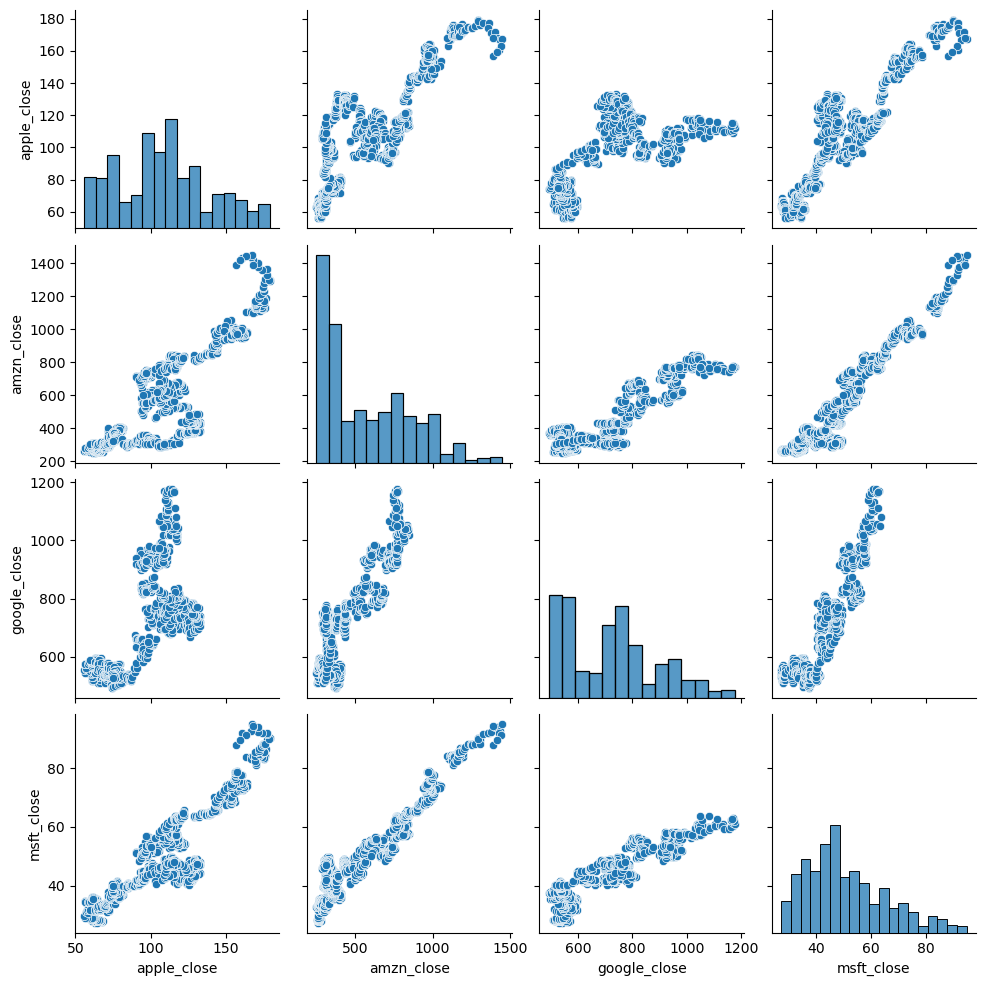

In [70]:
sns.pairplot(closing_price)

In [71]:
closing_price2.corr()

apple_close  amzn_close  google_close  msft_close
apple_close      1.000000    0.819078      0.640522    0.899689
amzn_close       0.819078    1.000000      0.888456    0.955977
google_close     0.640522    0.888456      1.000000    0.907011
msft_close       0.899689    0.955977      0.907011    1.000000

<Axes: >

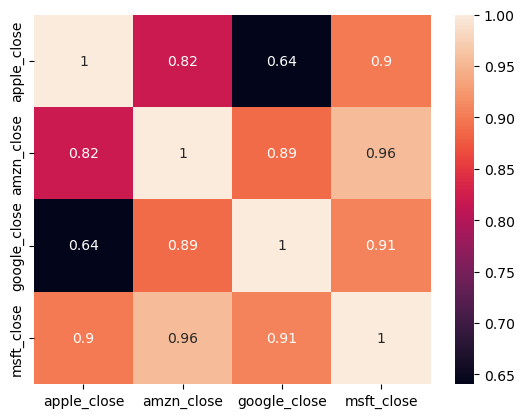

In [74]:
sns.heatmap(closing_price2.corr(),annot=True)

In [78]:
(closing_price2['apple_close'] - closing_price2['apple_close'].shift(1)) / closing_price2['apple_close'].shift(1) *100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [81]:
for col in closing_price2.columns:
    closing_price2[col+'_close_pct_change'] = (closing_price2[col] - closing_price2[col].shift(1)) / closing_price2[col].shift(1) *100

In [83]:
closing_price2.columns

Index(['apple_close', 'amzn_close', 'google_close', 'msft_close',
       'apple_close_close_pct_change', 'amzn_close_close_pct_change',
       'google_close_close_pct_change', 'msft_close_close_pct_change'],
      dtype='object')

In [84]:
closing_pct = closing_price2[['apple_close_close_pct_change', 'amzn_close_close_pct_change',
       'google_close_close_pct_change', 'msft_close_close_pct_change']]

In [85]:
closing_pct

apple_close_close_pct_change  amzn_close_close_pct_change  \
0                              NaN                          NaN   
1                         1.042235                    -1.809506   
2                        -2.506658                     0.579293   
3                        -0.190297                     4.163123   
4                        -0.089934                    -0.085353   
...                            ...                          ...   
1254                      0.209043                    -4.196734   
1255                     -4.339015                     2.874101   
1256                     -2.498442                    -2.793804   
1257                      4.179181                     3.801439   
1258                     -2.140710                    -1.806160   

      google_close_close_pct_change  msft_close_close_pct_change  
0                               NaN                          NaN  
1                          0.273968                     1.125227  
2                         -0.539295                     0.071788  
3                          1.829542                     0.538020  
4                         -0.028211                     0.035676  
...                             ...                          ...  
1254                            NaN                    -0.789391  
1255                            NaN                    -2.631021  
1256                            NaN                    -4.118544  
1257                            NaN                     3.784091  
1258                            NaN                    -1.883280  

[1259 rows x 4 columns]

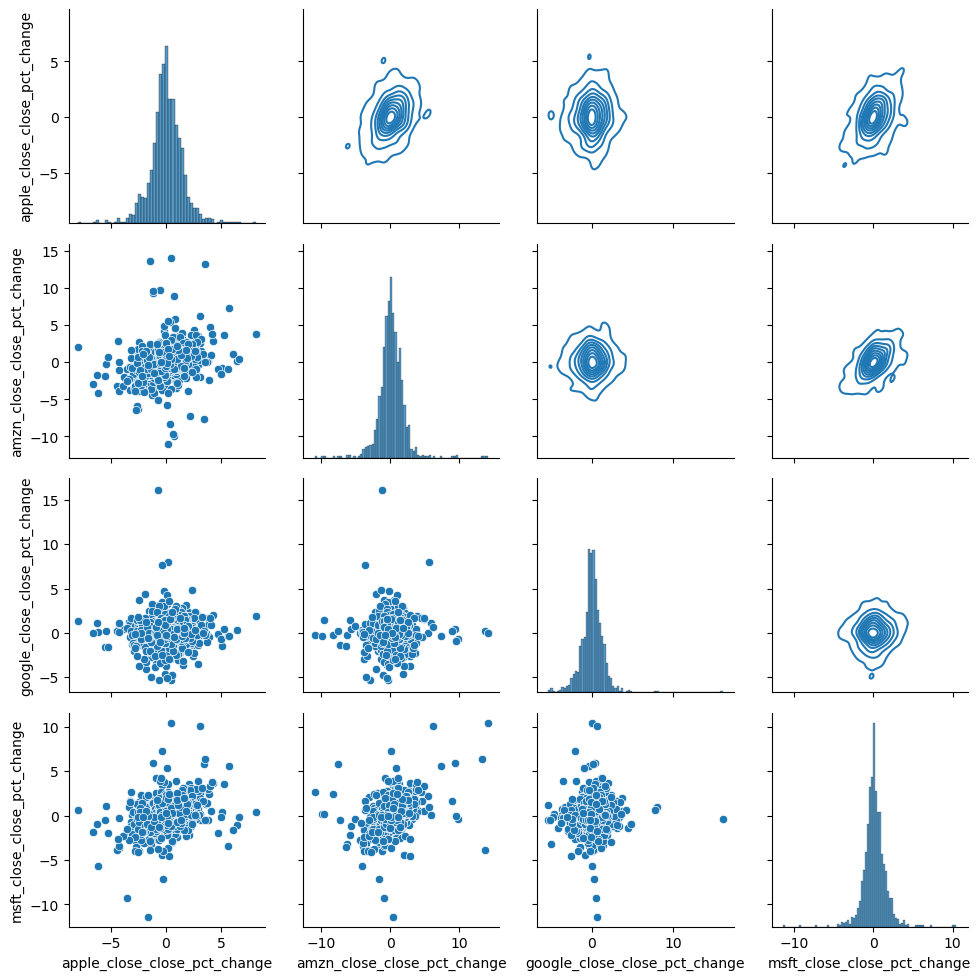

In [87]:
g = sns.PairGrid(data=closing_pct)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)
g